<a href="https://colab.research.google.com/github/RaisaTahasen/Project/blob/main/CSE422_Lab_Project_AI/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

BREAST CANCER DETECTION

In [ ]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import dataset from google drive
Data =pd.read_csv('/content/Breat_cancer_modified.txt',na_values=[' ', 'Null'])

In [ ]:
#Make copy of original data
Original_Data=Data.copy()
Original_Data.shape

(576, 32)

In [ ]:
Original_Data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,NaN,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Data.isnull().sum()

id                         0
diagnosis                  3
radius_mean                1
texture_mean               3
perimeter_mean             0
area_mean                  0
smoothness_mean            2
compactness_mean           0
concavity_mean             1
concave points_mean        3
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  2
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           1
compactness_worst          2
concavity_worst            4
concave points_worst       3
symmetry_worst             1
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Drop rows with null in diagnosis column since its an important feature
print(Original_Data.shape)
print(Data['diagnosis'].isnull().sum())
Data= Data.dropna( axis = 0 , subset =['diagnosis'])
print(Data.shape)

(576, 32)
3
(573, 32)


In [ ]:
#rows with 1 or more null values and the number of null values in each row
Data[Data.isnull().any(axis=1)].isnull().sum(axis=1)

0      1
567    1
569    3
570    4
571    4
574    3
dtype: int64

In [ ]:
#dropping rows with more than 1 null value
max_null_value=1
mask = Data.isnull().sum(axis=1) <= max_null_value
Data = Data[mask]
print(Data.shape)
Data[Data.isnull().any(axis=1)].isnull().sum(axis=1)
print(Data.isnull().sum())

(569, 32)
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       2
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.NaN, strategy='mean')

impute.fit(Data[['concave points_worst']])

Data['concave points_worst'] = impute.transform(Data[['concave points_worst']])


In [ ]:
#Imputed Data
Data['concave points_worst']
print(Data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
#Endocing/mapping categorical data
Data['diagnosis'] = Data['diagnosis'].map({'M':1,'B':0})
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.114075,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186000,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243000,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.257500,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.162500,0.2364,0.07678


In [ ]:
#Feature Selection
#dropping unnecessary column
#here, Id cannot be used for classification, so we drop it
to_drop = ["id"]
Data = Data.drop(to_drop, axis=1)
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.114075,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186000,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243000,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.257500,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.162500,0.2364,0.07678


<Axes: >

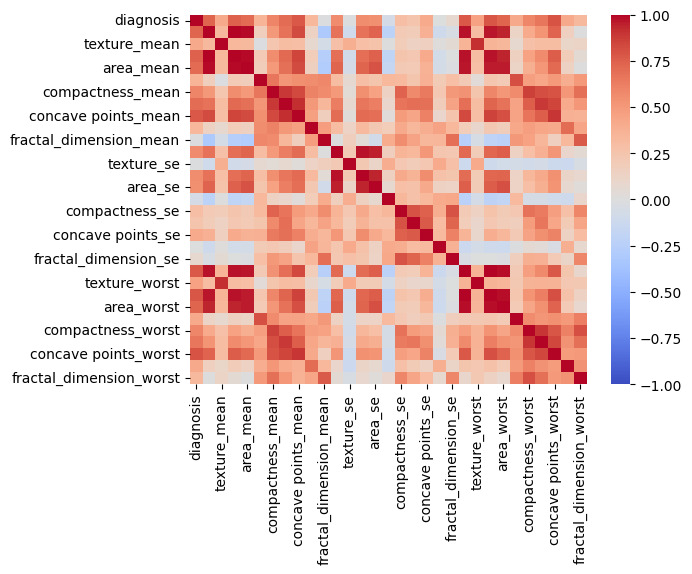

In [ ]:
import seaborn as sns
correlation=Data.corr()
sns.heatmap(correlation , fmt='.1g',
            vmin=-1, vmax=1,
            center=0, cmap = 'coolwarm', linewidths=0)


In [ ]:
weak_corr = ['symmetry_se','fractal_dimension_se','texture_se','fractal_dimension_mean','smoothness_se']
New_Data = Data.drop(weak_corr, axis=1)
New_Data.shape

(569, 26)

In [ ]:
#Splitting data into X and Y
y = New_Data.diagnosis # M=1 or B =0
X = New_Data.drop(['diagnosis'],axis = 1 )
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

<Axes: ylabel='diagnosis'>

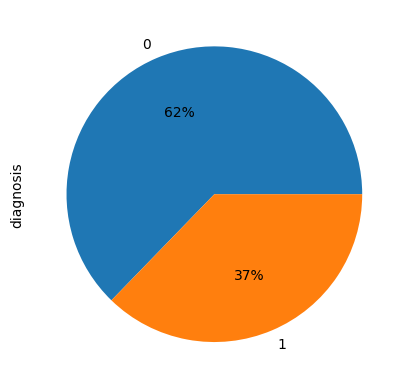

In [ ]:
y.value_counts()
y.value_counts().plot.pie(autopct='%d%%')

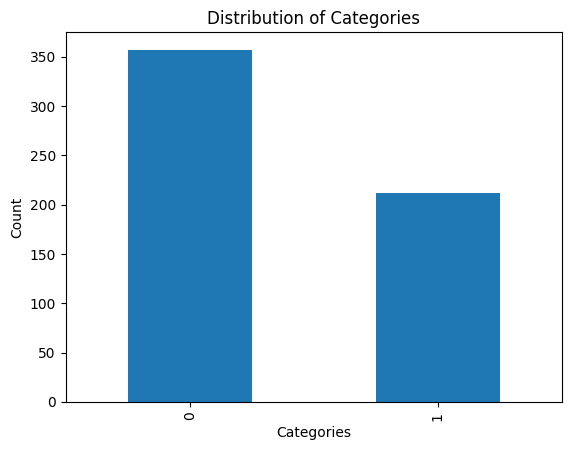

In [ ]:
y.value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

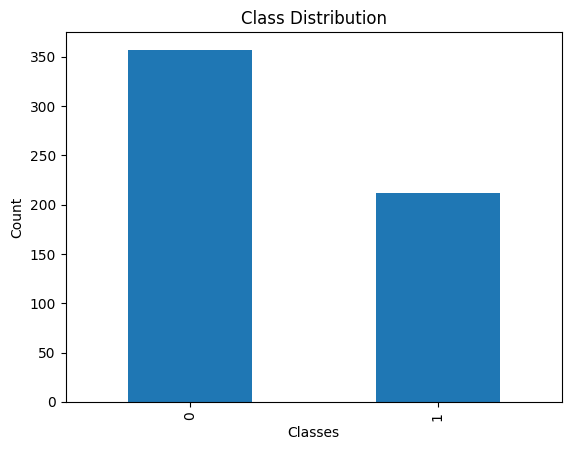

In [ ]:
y.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display class distribution before oversampling
print("Class distribution before oversampling:")
print(np.bincount(y_train))

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after oversampling:")
print(np.bincount(y_train_resampled))

# # Train a classifier on the oversampled data
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the test set
# y_pred = clf.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Class distribution before oversampling:
[286 169]

Class distribution after oversampling:
[286 286]

Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

